<a href="https://colab.research.google.com/github/Sheila-Otieno/Machine-learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.head()

,Invoice.ID,Branch,City,Customer.type,Gender,Product.type,Quantity,TotalPrice,Month.in.date,Payment.method,Gross.income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,7,548.9715,Jan,Ewallet,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,Mar,Cash,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,Mar,Credit card,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,8,489.0480,Jan,Ewallet,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,7,634.3785,Feb,Ewallet,30.2085,5.3


In [ ]:
high_price = data["Invoice.ID"].max()
high_price

'898-04-2717'

In [ ]:
data.groupby("Customer.type")[['Rating']].mean()

,Rating
Customer.type,
Member,6.940319
Normal,7.005210


In [ ]:
data.groupby("Product.type")[['Quantity']].count()

,Quantity
Product.type,
Electronic accessories,170
Fashion accessories,178
Food and beverages,174
Health and beauty,152
Home and lifestyle,160
Sports and travel,166


In [ ]:
data[data["Product.type"] == "Fashion accessories"]

,Invoice.ID,Branch,City,Customer.type,Gender,Product.type,Quantity,TotalPrice,Month.in.date,Payment.method,Gross.income,Rating
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,4,60.8160,Feb,Ewallet,2.8960,4.5
26,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,1,35.1960,Feb,Cash,1.6760,6.7
27,189-17-4241,A,Yangon,Normal,Female,Fashion accessories,2,184.1070,Mar,Credit card,8.7670,7.7
30,871-79-8483,B,Mandalay,Normal,Male,Fashion accessories,5,494.1825,Feb,Credit card,23.5325,4.8
49,574-22-5561,C,Naypyitaw,Member,Female,Fashion accessories,10,867.6150,Mar,Ewallet,41.3150,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...
974,744-82-9138,C,Naypyitaw,Normal,Male,Fashion accessories,2,180.8730,Feb,Cash,8.6130,8.2
975,883-69-1285,B,Mandalay,Member,Male,Fashion accessories,2,104.8320,Mar,Credit card,4.9920,7.0
985,374-38-5555,B,Mandalay,Normal,Female,Fashion accessories,5,334.4775,Feb,Ewallet,15.9275,8.5
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,10,183.6450,Feb,Ewallet,8.7450,6.6


In [ ]:
data.loc[data["Product.type"] == "Fashion accessories", "Quantity"]

10      4
26      1
27      2
30      5
49     10
       ..
974     2
975     2
985     5
993    10
999     7
Name: Quantity, Length: 178, dtype: int64

In [ ]:
products = data[["Product.type", "Quantity", "Month.in.date"]]
products.head()

,Product.type,Quantity,Month.in.date
0,Health and beauty,7,Jan
1,Electronic accessories,5,Mar
2,Home and lifestyle,7,Mar
3,Health and beauty,8,Jan
4,Sports and travel,7,Feb


In [ ]:
 products[products["Month.in.date"] == "Jan"][['Quantity']]


,Quantity
0,7
3,8
8,2
15,6
17,6
...,...
984,7
987,8
989,8
991,10


In [ ]:
products.groupby('Month.in.date').agg('size')['Jan']

352

In [ ]:
prod_jan = products[products['Product.type'] == "Fashion accessories"]
prod_jan

,Product.type,Quantity,Month.in.date
10,Fashion accessories,4,Feb
26,Fashion accessories,1,Feb
27,Fashion accessories,2,Mar
30,Fashion accessories,5,Feb
49,Fashion accessories,10,Mar
...,...,...,...
974,Fashion accessories,2,Feb
975,Fashion accessories,2,Mar
985,Fashion accessories,5,Feb
993,Fashion accessories,10,Feb


In [ ]:
prod_jan[prod_jan["Month.in.date"] == "Jan"][['Quantity']]

,Quantity
53,1
67,6
76,9
77,9
106,6
...,...
849,6
850,1
896,7
913,8


In [ ]:
prod_jan.groupby('Month.in.date').agg('size')['Jan']

64

In [ ]:
prods_jan = products[products['Month.in.date'] == "Jan"]
prods_jan

,Product.type,Quantity,Month.in.date
0,Health and beauty,7,Jan
3,Health and beauty,8,Jan
8,Health and beauty,2,Jan
15,Sports and travel,6,Jan
17,Sports and travel,6,Jan
...,...,...,...
984,Electronic accessories,7,Jan
987,Health and beauty,8,Jan
989,Health and beauty,8,Jan
991,Sports and travel,10,Jan


In [ ]:
prods_jan.groupby(['Product.type'])[['Quantity']].count()

,Quantity
Product.type,
Electronic accessories,54
Fashion accessories,64
Food and beverages,56
Health and beauty,49
Home and lifestyle,59
Sports and travel,70


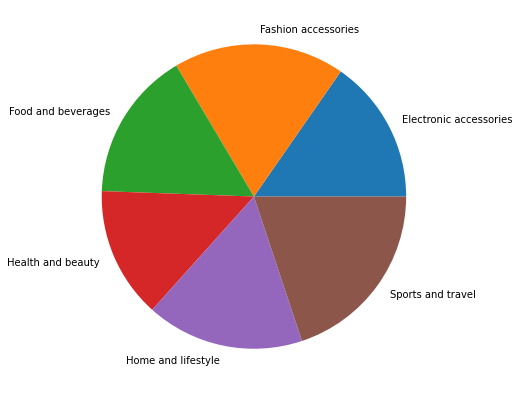

In [ ]:
nums = prods_jan.groupby(['Product.type'])[['Quantity']].count()

num = [54, 64, 56, 49, 59, 70]
label = ["Electronic accessories", "Fashion accessories", "Food and beverages", "Health and beauty", "Home and lifestyle", "Sports and travel"]

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(num, labels = label) 
  
# show plot 
plt.show() 

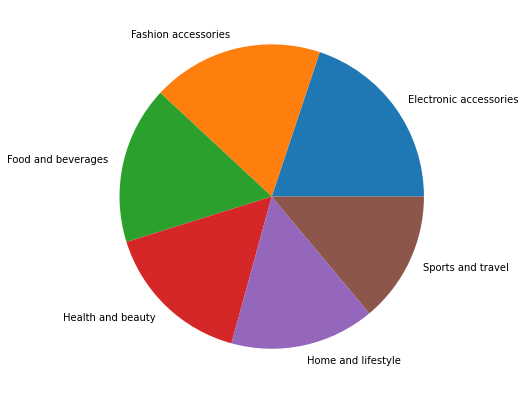

In [ ]:
prods = prods_jan['Product.type'].value_counts()
prods

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(prods, labels = label) 
  
# show plot 
plt.show() 

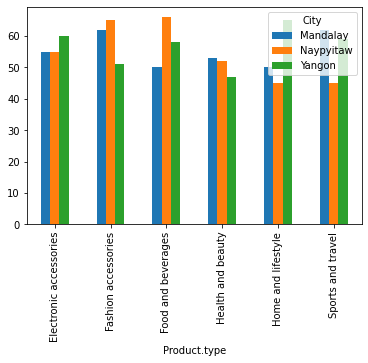

In [ ]:
e = data.groupby(['City','Product.type'])['TotalPrice'].count().unstack('City').plot.bar()

In [ ]:
#converts categorical values into dummy variables
data1 = pd.get_dummies(data)
#preparing dataset
X = data1.drop(['Gender_Female','Gross.income'], axis=1)
y = data1['Gross.income']
# splitting the data as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# creating the model
regressor = LinearRegression()
# training
regressor.fit(X_train, y_train)
# predicting
y_pred = regressor.predict(X_test)
# print(y_pred)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 2.6727159015860203e-07
